# Unsupervised Gaussian clustering

Experiment:

1. Generate cluster centroids from an `n_dim` Gaussian with `std_centers` standard deviation
2. Generate `n_samples` points for each of the `n_clusters` centered at cluster centroids with `std_clusters` standard deviation
3. Evaluate metric to compare ground truth cluster assignments and hebbian-lms predictions
4. Train Hebbian-LMS network on the dataset
5. Evaluate metric

The chosen metric is adjusted mutual information. This value is 1.0 for perfect cluster assignment (irrespective of permutation of cluster indices) and 0.0 for completely independent ground truth and prediction cluster assignments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from hebbian_lms import HebbLMSNet
from sklearn import metrics

In [2]:
std_centers = 10
std_clusters = 1
n_dim = 50
n_samples = 25000
random_state = 42

np.random.seed(random_state)

n_epochs = 30 # Number of epochs to train
n_epochs_save = 30 # Number of epochs to save training error for

In [3]:
# Generate centers with std_centers
centers, y = make_blobs(n_samples=25, centers=np.zeros((1,n_dim)), n_features=n_dim, cluster_std=std_centers,
                   random_state=random_state)

X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_dim, cluster_std=std_clusters,
                   random_state=random_state)

In [13]:
# Create hebbian lms network
hlms = HebbLMSNet(input_size=n_dim, layer_sizes=[50,50,50], excitatory_ratio=-1, percent=False, gamma=0.5, mu=0.0001)

In [14]:
# Make predictions and evaluate metric
y_hat = hlms.predict(X)
ami = metrics.adjusted_mutual_info_score(y, y_hat)
print('Clustering performance (adjusted mutual information)', ami)

Clustering performance (adjusted mutual information) 0.567661402990652


In [15]:
# Train network
errors = np.zeros((n_samples*n_epochs_save,))
epoch_errors = []
for n in range(n_epochs):
    _, _, error = hlms.fit(X)
    mse = np.mean(error**2, axis=1)
    if n < n_epochs_save:
        # Save errors for first n_epochs_save epochs
        errors[n*n_samples:n_samples*(n+1)] = mse
    epoch_mse = np.mean(mse)
    print(f"Epoch {n} mse: {epoch_mse}")
    epoch_errors.append(epoch_mse)

Epoch 0 mse: 0.7399995936735962
Epoch 1 mse: 0.364233792033765
Epoch 2 mse: 0.23859399670657824
Epoch 3 mse: 0.18077330780809353
Epoch 4 mse: 0.15034529680554753
Epoch 5 mse: 0.13228241080359524
Epoch 6 mse: 0.09299481768841797
Epoch 7 mse: 0.06011657802956559
Epoch 8 mse: 0.044701502349023314
Epoch 9 mse: 0.03729665452548117
Epoch 10 mse: 0.03277827026163977
Epoch 11 mse: 0.029191928536972504
Epoch 12 mse: 0.02617418061213069
Epoch 13 mse: 0.023390680835198883
Epoch 14 mse: 0.020795897983042683
Epoch 15 mse: 0.018501837390317324
Epoch 16 mse: 0.016625446290557587
Epoch 17 mse: 0.014996205101044682
Epoch 18 mse: 0.013483793309475422
Epoch 19 mse: 0.012139684533812294
Epoch 20 mse: 0.010997972087717264
Epoch 21 mse: 0.010025400698179641
Epoch 22 mse: 0.009172328934654968
Epoch 23 mse: 0.008410497593962363
Epoch 24 mse: 0.007716851639513679
Epoch 25 mse: 0.007074859597984585
Epoch 26 mse: 0.006481042634616275
Epoch 27 mse: 0.005934872691682492
Epoch 28 mse: 0.00543383664385437
Epoch 29 m

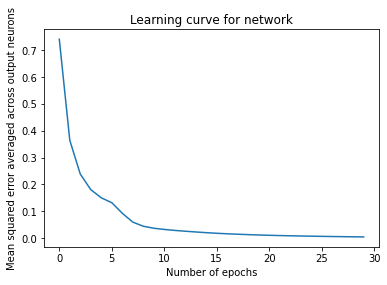

In [16]:
plt.plot(epoch_errors);
plt.title('Learning curve for network');
plt.xlabel('Number of epochs');
plt.ylabel('Mean squared error averaged across output neurons');

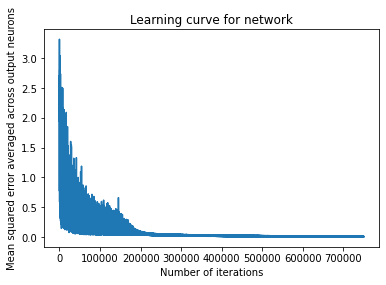

In [17]:
plt.plot(errors);
plt.title('Learning curve for network');
plt.xlabel('Number of iterations');
plt.ylabel('Mean squared error averaged across output neurons');

In [18]:
# Make predictions and evaluate metric
y_hat = hlms.predict(X)
ami = metrics.adjusted_mutual_info_score(y, y_hat)
print('Clustering performance (adjusted mutual information)', ami)

Clustering performance (adjusted mutual information) 1.0
